In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

#Define the stocks
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']
#Define the time period
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=10*365)

#Fetch the data
stock_data = {}
for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)
            print(f"Flattened MultiIndex columns for {ticker}")
        if data.empty:
            print(f"No data found for {ticker}.")
            continue
        stock_data[ticker] = data
        print(f"Successfully downloaded data for {ticker}")
    except Exception as e:
        print(f"Could not download data for {ticker}. Error: {e}")

#Verify the download
if stock_data:
    sample_ticker = list(stock_data.keys())[0] 
    print(f"\n--- Sample Data for {sample_ticker} ---")
    print("Columns:", stock_data[sample_ticker].columns)
    print(stock_data[sample_ticker].head())

C:\Users\rishabh\AppData\Local\Temp\ipykernel_11964\1763465938.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\rishabh\AppData\Local\Temp\ipykernel_11964\1763465938.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Flattened MultiIndex columns for RELIANCE.NS
Successfully downloaded data for RELIANCE.NS


[*********************100%***********************]  1 of 1 completed
C:\Users\rishabh\AppData\Local\Temp\ipykernel_11964\1763465938.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Flattened MultiIndex columns for TCS.NS
Successfully downloaded data for TCS.NS


[*********************100%***********************]  1 of 1 completed
C:\Users\rishabh\AppData\Local\Temp\ipykernel_11964\1763465938.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Flattened MultiIndex columns for HDFCBANK.NS
Successfully downloaded data for HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed
C:\Users\rishabh\AppData\Local\Temp\ipykernel_11964\1763465938.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Flattened MultiIndex columns for INFY.NS
Successfully downloaded data for INFY.NS


[*********************100%***********************]  1 of 1 completed

Flattened MultiIndex columns for ICICIBANK.NS
Successfully downloaded data for ICICIBANK.NS

--- Sample Data for RELIANCE.NS ---
Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price            Close        High         Low        Open   Volume
Date                                                               
2015-08-07  214.144699  216.244048  212.578330  212.980800  8608888
2015-08-10  210.783554  215.112779  209.826335  214.177329  9288894
2015-08-11  210.152664  211.816913  208.412261  211.240409  8762464
2015-08-12  205.127289  210.152681  204.616048  209.630563  9650325
2015-08-13  203.049698  207.531218  202.190373  206.019249  9340350


In [2]:
import pandas_ta as ta

for ticker, df in stock_data.items():
    #1. Feature Engineering: Calculate Technical Indicators
    
    # Calculate Relative Strength Index (RSI) which measures momentum on a scale of 0 to 100.
    df.ta.rsi(length=14, append=True)
    # Calculate Moving Average Convergence Divergence (MACD) which is a trend-following momentum indicator.
    df.ta.macd(fast=12, slow=26, signal=9, append=True)
    # Calculate Bollinger Bands. These bands measure volatility by showing a price range around a simple moving average.
    df.ta.bbands(length=20, std=2, append=True)
    
    #2. Target Definition: Will the price go UP tomorrow?
    # We want to predict if the next day's 'Close' price will be higher than the current day's.
    # We use .shift(-1) to look one day into the future.
    # The result is 1 if the price goes up, and 0 if it goes down or stays the same.
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    
    #3. Clean the Data
    # Calculating indicators and shifting the target creates rows with missing values (NaN).
    # We drop these rows to ensure our dataset is clean.
    df.dropna(inplace=True)

#Verify result of one of the DataFrames to see new columns.
if stock_data:
    sample_ticker = list(stock_data.keys())[0]
    print(f"\n--- Data for {sample_ticker} after Feature Engineering ---")
    # Display the last 5 rows to see the new features and the Target column
    print(stock_data[sample_ticker].tail())

C:\Users\rishabh\Desktop\algorithmic-trading-engine\quant_env\Lib\site-packages\pandas_ta\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound



--- Data for RELIANCE.NS after Feature Engineering ---
Price             Close         High          Low         Open    Volume  \
Date                                                                       
2025-07-28  1387.599976  1407.800049  1385.000000  1392.300049   7748361   
2025-07-29  1417.099976  1420.199951  1383.000000  1383.000000  10750072   
2025-07-30  1410.099976  1423.300049  1401.300049  1418.099976   7209849   
2025-07-31  1390.199951  1402.599976  1382.199951  1388.099976  17065827   
2025-08-01  1393.699951  1405.900024  1384.300049  1386.900024  10321171   

Price          RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  \
Date                                                                
2025-07-28  29.716545    -18.031500     -15.015276      -3.016224   
2025-07-29  40.355353    -18.246702     -12.184382      -6.062319   
2025-07-30  38.852490    -18.765772     -10.162762      -8.603010   
2025-07-31  34.876120    -20.546062      -9.554442     -10.991620 

Training data size: 1945 samples
Test data size: 487 samples

--- Model Evaluation for RELIANCE.NS ---
Accuracy: 0.4867
Precision (for predicting 'Up'): 0.4923

Confusion Matrix:


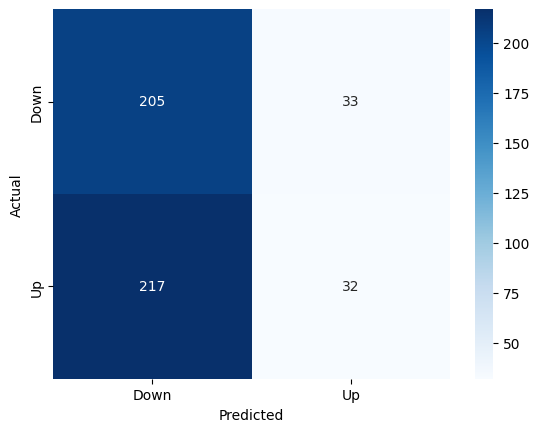

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select a single stock to train the model on for now
ticker = 'RELIANCE.NS'
df = stock_data[ticker]

#1. Define Features (X) and Target (y)
X = df.drop(columns=['Target'])
y = df['Target']

#2. Split Data Chronologically (Crucial for Time Series)
# DO NOT use train_test_split from sklearn as it shuffles the data and we must preserve the time sequence.
# Define the split point (e.g., 80% for training, 20% for testing)
split_percentage = 0.8
split_index = int(len(X) * split_percentage)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(f"Training data size: {len(X_train)} samples")
print(f"Test data size: {len(X_test)} samples")


#3. Train the Random Forest Model
# Random Forest is a strong choice as it's robust and handles complex data well.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

#4. Preliminary Model Evaluation
# This checks the model's predictive power, not its financial performance yet.
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Precision is important: how many 'up' predictions were correct?
print(f"\n--- Model Evaluation for {ticker} ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for predicting 'Up'): {precision:.4f}")

# Display a confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()